In [11]:
# --- CELL 1: IMPORTS & SETUP ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import sys
import os

# Fix Path to allow importing from src
sys.path.append(os.path.abspath(os.path.join('..')))
from src.config import RAW_DATA_PATH, PROCESSED_DATA_PATH

In [12]:
# --- CELL 2: LOAD DATA ---
print(f"Loading data from: {RAW_DATA_PATH}")
df = pd.read_csv(RAW_DATA_PATH, parse_dates=['Date'], index_col='Date')
df.sort_index(inplace=True)
print(f"Data Shape: {df.shape}")

Loading data from: C:\VS Code\amdox-data-analytics\data\raw\stock_data.csv
Data Shape: (3019, 6)


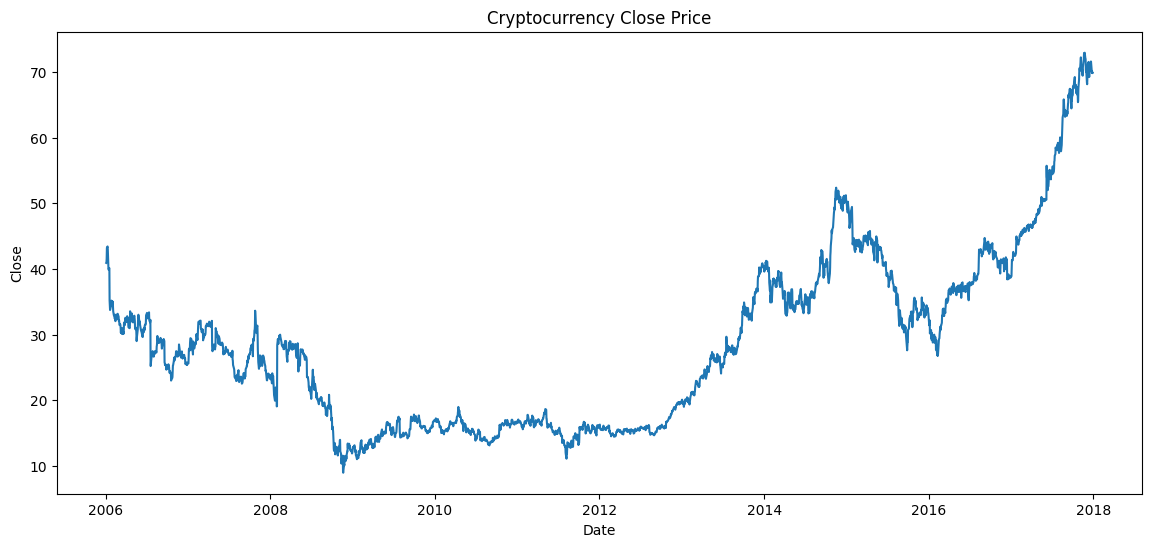

In [13]:
# --- CELL 3: VISUALIZATION ---
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x=df.index, y='Close')
plt.title('Cryptocurrency Close Price')
plt.show()

In [14]:
# --- CELL 4: STATIONARITY CHECK ---
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    return result[1]

print("Checking Original Series...")
check_stationarity(df['Close'])

print("\nChecking Differenced Series...")
df['Stationary_Close'] = df['Close'].diff().dropna()
check_stationarity(df['Stationary_Close'].dropna())

Checking Original Series...
ADF Statistic: 0.9478981895596881
p-value: 0.9936846299287978

Checking Differenced Series...
ADF Statistic: -12.447565326070878
p-value: 3.6357795917181037e-23


np.float64(3.6357795917181037e-23)

In [15]:
# --- CELL 5: EXPORT ---
# Forward Fill to handle any NaNs before saving
df.ffill(inplace=True)  # UPDATED: Replaced fillna(method='ffill') with ffill()

df.to_csv(PROCESSED_DATA_PATH)
print(f"Clean data saved to: {PROCESSED_DATA_PATH}")

Clean data saved to: C:\VS Code\amdox-data-analytics\data\processed\processed_stock_data.csv
